In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# Load the Titanic dataset
data = pd.read_csv('train.csv')

In [134]:
# Data overview
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


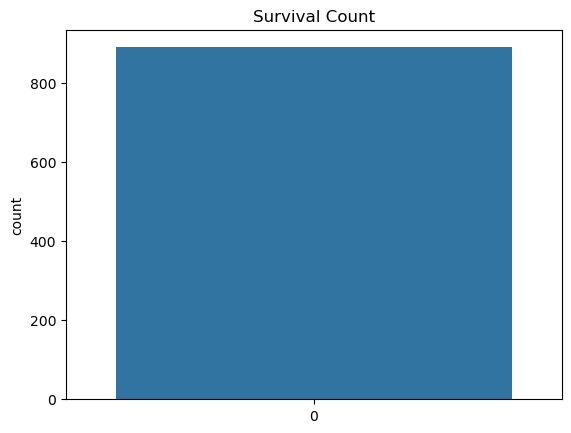

In [135]:
# Data visualization: Distribution of target variable 'Survived'
sns.countplot(data['Survived'])
plt.title('Survival Count')
plt.show()

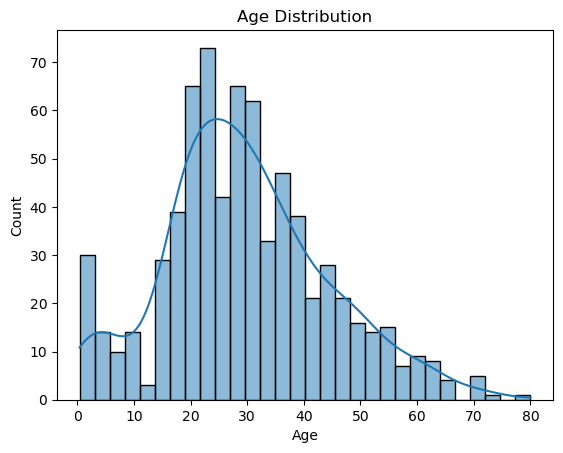

In [136]:
# Data visualization: Age distribution
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

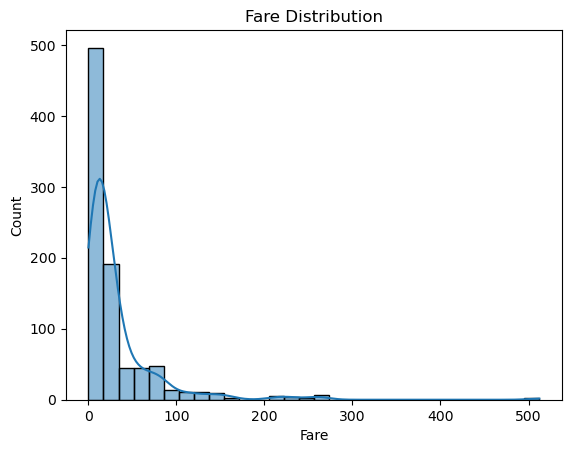

In [137]:
# Data visualization: Fare distribution
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

In [138]:
# Impute missing values for numerical features with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])

# Impute missing values for categorical feature 'Embarked' with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [139]:
# Drop irrelevant columns
data.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True)

In [140]:
# One-Hot Encoding for categorical features

categorical_features = ['Sex', 'Embarked']
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_features = one_hot_encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=one_hot_encoder.get_feature_names_out(categorical_features))

In [141]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [142]:
# Create new features
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = (data['FamilySize'] == 1).astype(int)

In [143]:
# Extracting titles from names and creating a new feature
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

title_dummies = pd.get_dummies(data['Title'], prefix='Title')
data = pd.concat([data, title_dummies], axis=1)
data.drop(columns=['Title'], inplace=True)

In [144]:
# Define features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

In [145]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# Data overview after preprocessing and feature engineering
print(X_train.head())
print(y_train.head())

     Pclass                                Name     Sex       Age  SibSp  \
331       1                 Partner, Mr. Austen    male  1.215947      0   
733       2          Berriman, Mr. William John    male -0.515526      0   
382       3                  Tikkanen, Mr. Juho    male  0.177063      0   
704       3             Hansen, Mr. Henrik Juul    male -0.284663      1   
813       3  Andersson, Miss. Ebba Iris Alfrida  female -1.823750      4   

     Parch      Fare Embarked  FamilySize  IsAlone  Title_Master  Title_Miss  \
331      0 -0.074583        S           1        1             0           0   
733      0 -0.386671        S           1        1             0           0   
382      0 -0.488854        S           1        1             0           0   
704      0 -0.490280        S           2        0             0           0   
813      2 -0.018709        S           7        0             0           1   

     Title_Mr  Title_Mrs  Title_Rare  
331         1          